In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np
import pickle
import io
import copy
%matplotlib inline

plt.style.use('default')

def copyplot(figure):
    buf = io.BytesIO()
    pickle.dump(figure, buf)
    buf.seek(0)
    fig = pickle.load(buf)
    axes = fig.get_axes()
    if len(axes) == 1:
        return fig, axes[0]
    return fig, axes
    

In [3]:
# data = ''.join([row.replace(':', ',') for row in open('files/w3bar1.txt')])
# lang = pd.read_csv(io.StringIO(data), index_col=0, header=None).T
lang = pd.read_csv('files/w3bar1.txt', sep="[,:]\ ", index_col=0, header=None, engine='python').T
print(lang)
lang.Popularity = lang.Popularity.astype(float)

0 Programming languages Popularity
1                  Java       22.2
2                Python       17.6
3                   PHP        8.8
4            JavaScript          8
5                    C#        7.7
6                   C++        6.7


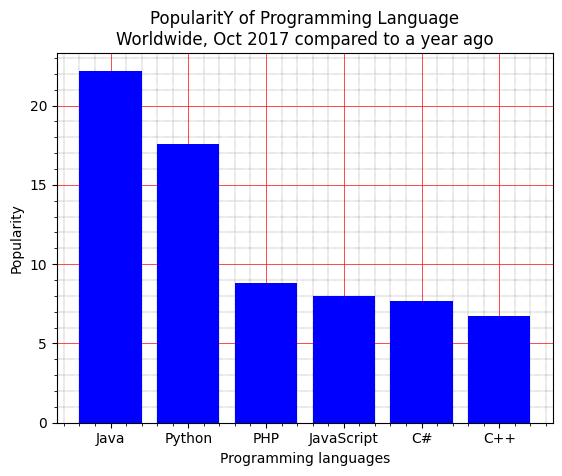

In [4]:
# lang.plot(kind='bar')

def default_bars(bar_params = {}):
    fig, ax = plt.subplots()
    ax.bar(lang['Programming languages'], lang.Popularity, color='b', **bar_params)
    ax.minorticks_on()
    ax.grid(True, 'major', c='red', lw=.5)
    ax.grid(True, 'minor', c='black', lw=.3, ls=':')
    ax.set_axisbelow(True)
    labels = dict(xlabel=lang.columns[0], ylabel=lang.columns[1],
                  title="PopularitY of Programming Language\n" + "Worldwide, Oct 2017 compared to a year ago")
    ax.set(**labels)
    return fig, ax

fig0, ax0 = default_bars()

[Text(0.5, 0, 'Popularity'),
 Text(0, 0.5, 'Programming languages'),
 Text(0.5, 1.0, 'PopularitY of Programming Language\nWorldwide, Oct 2017 compared to a year ago')]

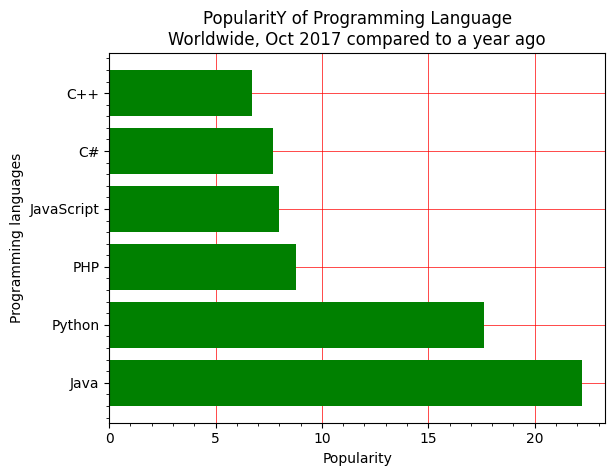

In [5]:
plt.rc('axes', axisbelow=True, grid=True)
plt.rc('grid', c='red', lw=.5)
plt.rcParams.update({
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
})
# print(plt.rcParams)

fig, ax = plt.subplots()
ax.barh(lang['Programming languages'], lang.Popularity, color='g')

ax.set(xlabel=ax0.get_ylabel(), ylabel=ax0.get_xlabel(), title=ax0.get_title())

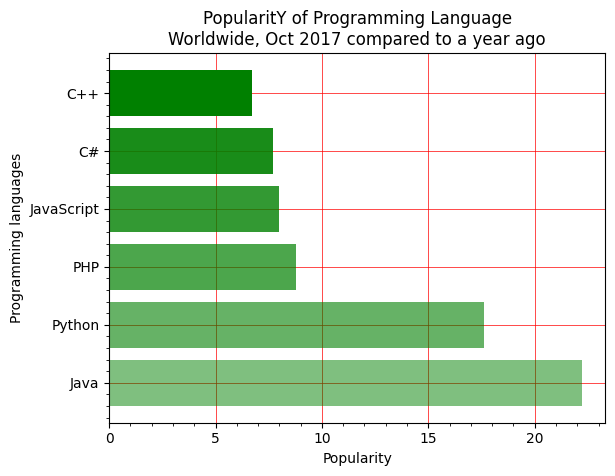

In [6]:
alphas = np.linspace(0.5, 1, len(ax.patches))
for i, patch in enumerate(ax.patches):
    patch.set_alpha(alphas[i])
fig

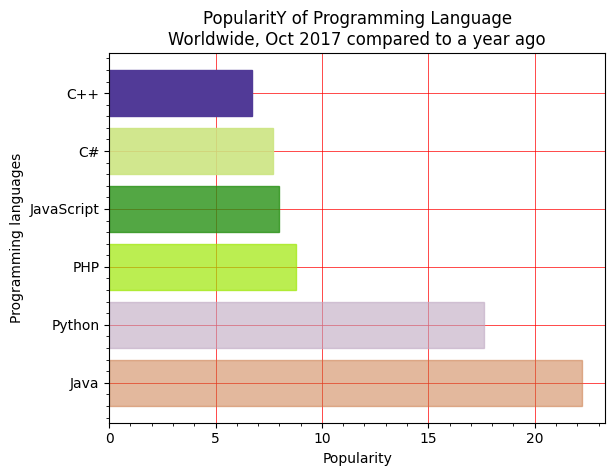

In [7]:
rgb = np.random.random((len(ax.patches), 3))
a = np.full(len(ax.patches), 1)   #don't concern
rgba = np.concatenate([rgb, a[:, np.newaxis]], axis=1)
for i in range(len(ax.patches)):
    ax.patches[i].set_color(rgba[i])
fig

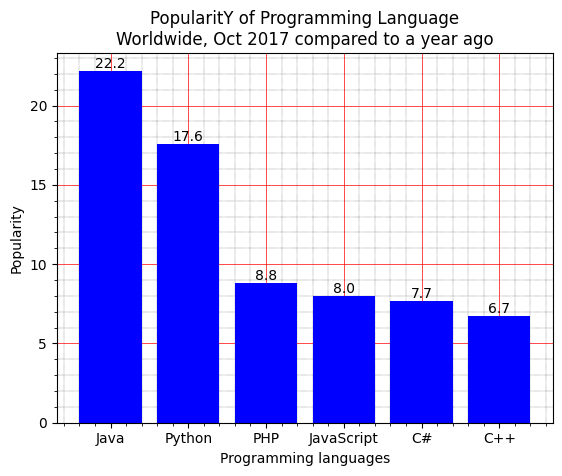

In [8]:
# fig, ax = fig0, ax0
# ax.texts = []
# or
fig, ax = copyplot(fig0)

for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width() / 2,
            patch.get_height(),
            patch.get_height(), ha='center', va='bottom')
fig

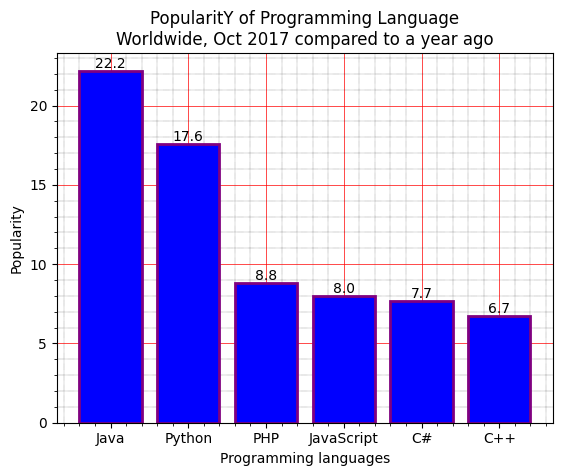

In [9]:
for patch in ax.patches:
    patch.set(edgecolor = 'purple', lw=2)
fig

[Text(8, 0, 'Java'),
 Text(1, 0, 'Python'),
 Text(2, 0, 'PHP'),
 Text(3, 0, 'JavaScript'),
 Text(4, 0, 'C#'),
 Text(7, 0, 'C++')]

c:\users\danii\appdata\local\programs\python\python39\lib\site-packages\matplotlib\ticker.py:2957: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)
c:\users\danii\appdata\local\programs\python\python39\lib\site-packages\matplotlib\ticker.py:2957: RuntimeWarning: invalid value encountered in double_scalars
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


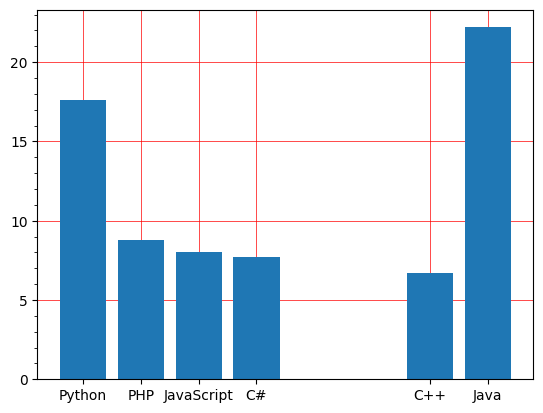

In [10]:
# DOESN'T WORK
# mixed_lang = lang.copy()
# for i in np.arange(5) + lang.index.max() + 1:
#     mixed_lang.loc[i] = ['', 0]
#or
# empty_df = pd.DataFrame({lang.columns[0]: [''] * 5, lang.columns[1]: np.zeros(5)})
# mixed_lang = lang.append(empty_df)
#or !!!right way!!!
# raw = lang.values.tolist() + [['', 0]] * 5
# mixed_lang = pd.DataFrame(raw, columns=lang.columns)

# mixed_lang = mixed_lang.sample(frac=1).reset_index(drop=True)
# mixed_lang

x_pos = np.random.choice(np.arange(10), size=6, replace=False)
x_pos
fig, ax = plt.subplots()
ax.bar(x_pos, lang.Popularity.values)
ax.set_xticks(x_pos)
ax.set_xticklabels(lang['Programming languages'].values)

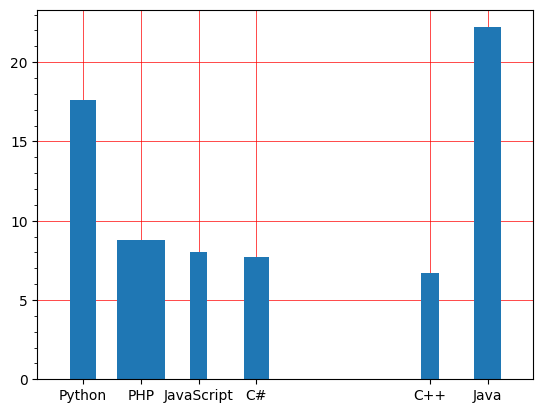

In [11]:
default_width = ax.patches[0].get_width()
for patch in ax.patches:
    patch.set_width(np.random.random())
    patch.set_x(patch.get_x() + (default_width - patch.get_width()) / 2)
fig
#or just
# default_bars(dict(width=np.linspace(0.2, 1, 6)))

[Text(0, 0, 'Java'),
 Text(1, 0, 'Python'),
 Text(2, 0, 'PHP'),
 Text(3, 0, 'JavaScript'),
 Text(4, 0, 'C#'),
 Text(5, 0, 'C++')]

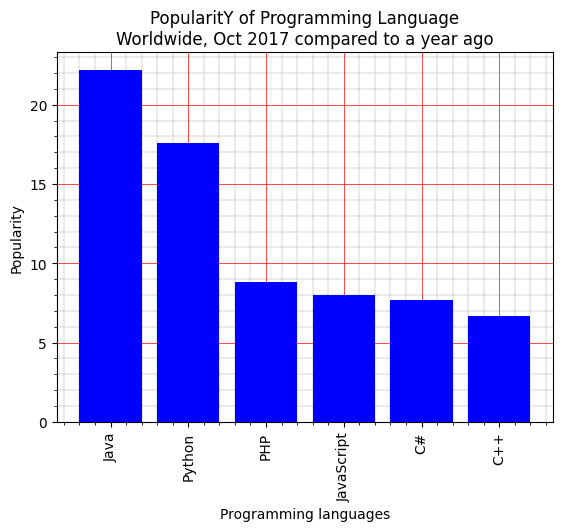

In [12]:
fig, ax = default_bars()
ax.set_xticks(np.arange(len(lang)))
ax.set_xticklabels(lang['Programming languages'], rotation=90)

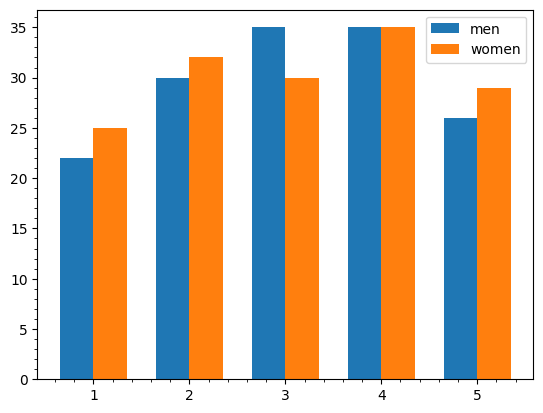

In [13]:
import re

def people_pipeline(path):
    data = ''.join([re.sub(r'[\(\)\ ]', '', row)
                .replace('Means', '').replace('=', ',')
                for row in open(path)])
    return pd.read_csv(io.StringIO(data), index_col=0, header=None).T


scores = people_pipeline('files/w3bar10.txt')
scores.columns.name = 'Scores'

# scores.plot(kind='bar')
#or
bar_width = 0.35
plt.bar(scores.index - bar_width / 2, scores['men'], label='men', width=bar_width)
plt.bar(scores.index + bar_width / 2, scores['women'], label='women', width=bar_width)
plt.legend()
plt.grid(False)

    a  b  c  d  e
2   4  8  5  7  6
4   2  3  4  2  6
6   4  7  4  7  8
8   2  6  4  8  6
10  2  4  3  3  2


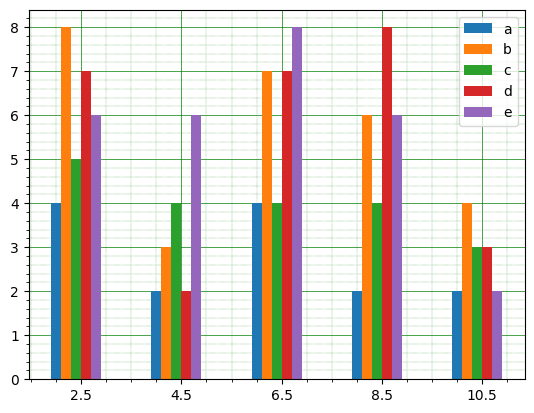

In [14]:
plt.rc('grid', color='green')
plt.grid(True, 'minor', lw=.3, ls=':')

abcde = pd.read_csv('files/w3bar11.txt', sep=r'[,\ ]', engine='python')
print(abcde)

bw = 0.2
indices = np.arange(len(abcde.columns))
for i in indices:
    plt.bar(abcde.index + bw * i, abcde.iloc[:, i], label=abcde.columns[i], width=bw)
plt.xticks(ticks=abcde.index + bw * len(indices) / 2)
plt.legend()

0  Mean velocity  Standard deviation of velocity
1          54.74                             4.0
2          42.35                             3.0
3          67.37                             4.0
4          58.24                             1.0
5          30.25                             5.0


<BarContainer object of 5 artists>

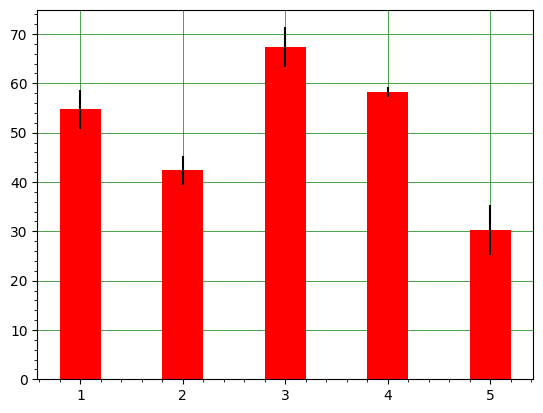

In [15]:
velocities = pd.read_csv('files/w3bar12.txt', sep='[:,]', engine='python', header=None, index_col=0).T
print(velocities)
fig, ax = plt.subplots()
ax.bar(velocities.index, velocities['Mean velocity'], yerr=velocities['Standard deviation of velocity'],
        width=0.4, color='red')

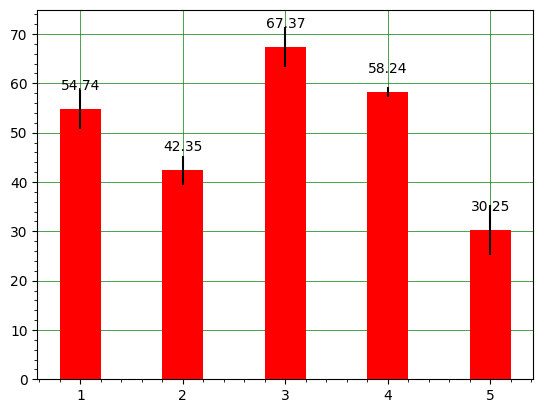

In [16]:
ax.texts = []
for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width() / 2,
            patch.get_height() + velocities['Standard deviation of velocity'].mean(),
            patch.get_height(), ha='center', va='bottom')
fig

   men  women  men_std  women_std
1   22     25        4          3
2   30     32        3          5
3   35     30        4          2
4   35     35        1          3
5   26     29        5          3


<BarContainer object of 5 artists>

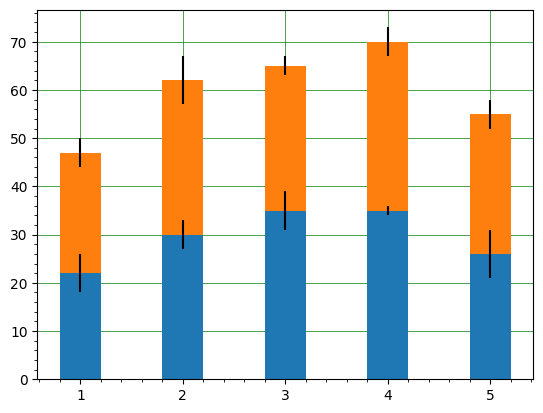

In [17]:
scores = people_pipeline('files/w3bar14.txt')
scores.columns = ['men', 'women', 'men_std', 'women_std']
print(scores)
# scores.iloc[:, :2].plot(kind='bar', stacked=True, yerr=scores.iloc[:, :2])
plt.bar(scores.index, scores.men, yerr=scores.men_std, width=0.4)
plt.bar(scores.index, scores.women, yerr=scores.women_std, bottom=scores.men, width=0.4)

['"languages": [["Language","Science","Math"],\n', '["Science","Math","Language"],\n', '["Math","Language","Science"]],\n', '"numbers": [{"Language":75, "Science":88, "Math":96},\n', '{"Language":71, "Science":95, "Math":92},\n', '{"Language":75, "Science":90, "Math":89}]']


<AxesSubplot:>

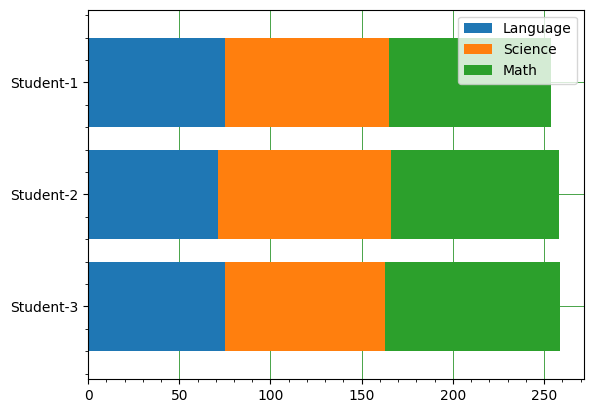

In [218]:
import json

def chained_replace(line, pairs):
    for old, new in pairs.items():
        line = line.replace(old, new)
    return line

def json_pipeline(path):
    lines = []
    with open(path) as f:
        for line in f:
            if line[0] == '#':
                continue
            result = re.match('\w.*\s=', line)
            if result is not None:
                line = '"' + result.group(0)[0:-2] + '":' + line[result.end():]
            if line[-1] == '\n' and line[-2] != ',':
                line = line[:-1] + ',\n'
            lines.append(chained_replace(line, {"'": "\"", '(': '[', ')': ']'}))
    print(lines)
    out_json = f"{{\n{''.join(lines)}\n}}"
    return json.loads(out_json)

# need special order
data = json_pipeline('files/w3bar15.txt')
series = []
for i in range(len(data['languages'])):
    series.append(pd.Series(data['numbers'][i], index=data['languages'][i]))
                  
exams = pd.DataFrame(series, index=['Student-3', 'Student-2', 'Student-1'])
exams.plot(kind='barh', stacked=True, width=0.8)

['"people": ["G1","G2","G3","G4","G5","G6","G7","G8"],\n', '"segments": 4,\n', '"data": [[ 3.40022085, 7.70632498, 6.4097905, 10.51648577, 7.5330039, 7.1123587, 12.77792868, 3.44773477],\n', '[ 11.24811149, 5.03778215, 6.65808464, 12.32220677, 7.45964195, 6.79685302, 7.24578743, 3.69371847],\n', '[ 3.94253354, 4.74763549, 11.73529246, 4.6465543, 12.9952182, 4.63832778, 11.16849999, 8.56883433],\n', '[ 4.24409799, 12.71746612, 11.3772169, 9.00514257, 10.47084185, 10.97567589, 3.98287652, 8.80552122]]']


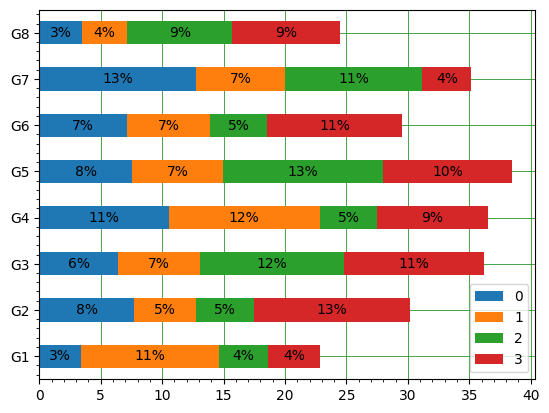

In [250]:
data = json_pipeline('files/w3bar16.txt')
segments = pd.DataFrame(data['data'], columns=data['people'])
ax = segments.T.plot(kind='barh', stacked=True)
for patch in ax.patches:
    ax.text(patch.get_x() + patch.get_width() / 2,
            patch.get_y() + patch.get_height() / 2,
            f'{patch.get_width() :.0f}%', ha='center', va='center')

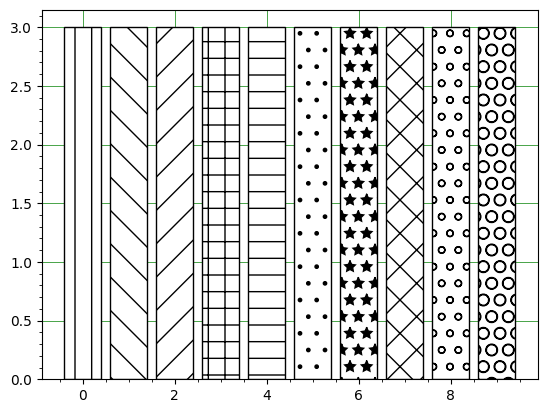

In [253]:
fig = plt.figure()
ax = fig.add_subplot(111)
patterns = [ "|" , "\\" , "/" , "+" , "-", ".", "*","x", "o", "O" ]

for i in range(len(patterns)):
    ax.bar(i, 3, color='white', edgecolor='black', hatch=patterns[i])